# Cyclus parameter fidelity assessment tool

This tool is designed to help users understand the behavior of Cyclus archetypes.

In [12]:
import subprocess

import cymetric as cym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (40,24)

from cymetric import graphs as cgr
from cymetric import timeseries as tm
from cymetric import filters as fl

#import cyclus

Enter two file paths to compare: 
(expand this later?)

In [13]:
infiles = ["candu_one_day.py", "candu_one_month.py"]

In [19]:
process1 = subprocess.run(['cyclus', infiles[0], '-o', 'candu_one_day.sqlite'], stdout=subprocess.PIPE)

#-m cyclus "candu_one_day.py"
with open('candu_one_day.log', 'w') as f:
    print(process1.stdout.decode('utf-8'))
    f.write(process1.stdout.decode('utf-8'))

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

In [20]:
process2 = subprocess.run(['cyclus', infiles[1], '-o', 'candu_one_month.sqlite'], stdout=subprocess.PIPE)

with open('candu_one_month.log', 'w') as f:
    print(process2.stdout.decode('utf-8'))
    f.write(process2.stdout.decode('utf-8'))

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

In [21]:
outfile1 = "candu_one_day.sqlite"
db = cym.dbopen(outfile1)
ev = cym.Evaluator(db=db, write=True)

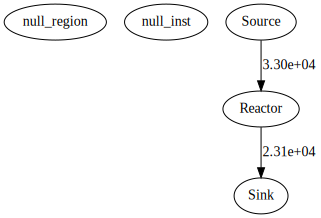

In [22]:
cym.graphs.flow_graph(ev, label = "mass")

In [23]:
outfile2 = "candu_one_month.sqlite"
db2 = cym.dbopen(outfile2)
ev2 = cym.Evaluator(db=db2, write=True)

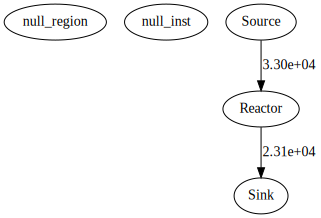

In [24]:
cym.graphs.flow_graph(ev2, label = "mass")

In [29]:
outfile3 = "candu_six_weeks.sqlite"
db3 = cym.dbopen(outfile3)
ev3 = cym.Evaluator(db=db3, write=True)

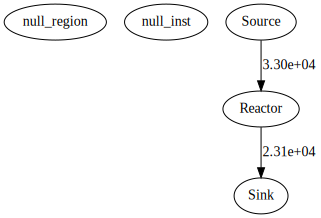

In [30]:
cym.graphs.flow_graph(ev3, label = "mass")

In [36]:
day_quantities = []
for i in range(4320): 
    subset = ev.eval("ExplicitInventory", conds = [("Time", "==", i)])
    day_quantities.append(sum(subset["Quantity"]))

month_quantities = []
for i in range(144):
    subset = ev2.eval("ExplicitInventory", conds = [("Time", "==", i)])
    month_quantities.append(sum(subset["Quantity"]))
    
six_week_quantities = []
for i in range(96):
    subset = ev3.eval("ExplicitInventory", conds = [("Time", "==", i)])
    six_week_quantities.append(sum(subset["Quantity"]))

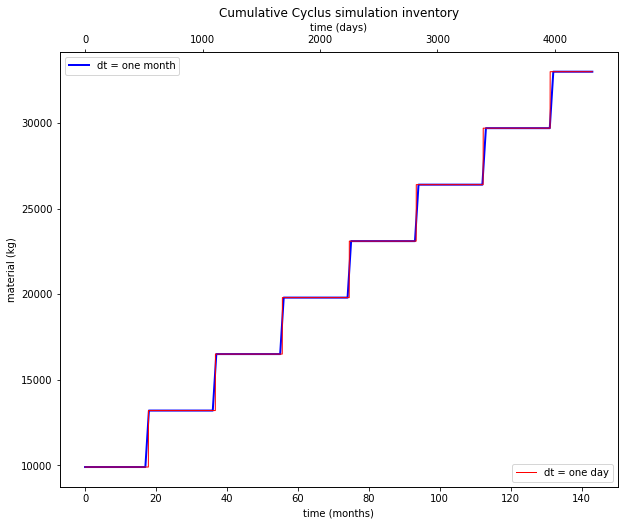

In [37]:
fig, ax1 = plt.subplots(figsize = (10,8))

ax1.plot(range(144), month_quantities, color = "b", linewidth = 2.0, label = "dt = one month")
#ax1.plot(range(144), unscaled_quantities, color = "y", linewidth = 2.0, label = "cycle time = 17")
ax1.set_xlabel("time (months)")
ax1.set_ylabel("material (kg)")
ax1.legend(loc = "upper left")

ax2 = ax1.twiny()
ax2.plot(range(4320), day_quantities, color = "r", linewidth = 1.0, label = "dt = one day")
ax2.set_xlabel("time (days)")

plt.title("Cumulative Cyclus simulation inventory")
plt.legend(loc='lower right') 

plt.show()

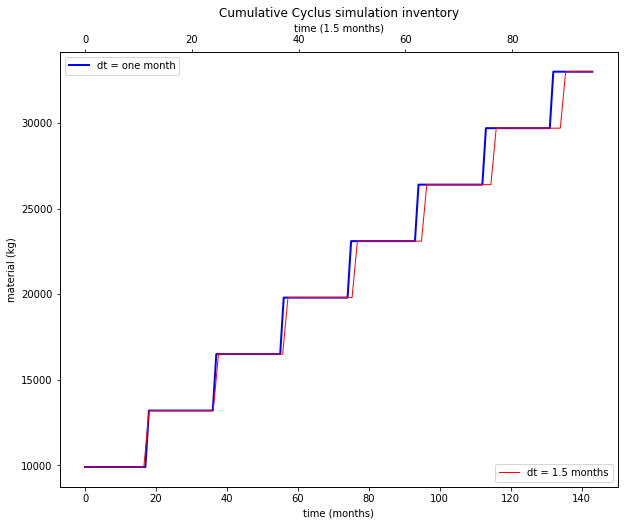

In [38]:
fig, ax1 = plt.subplots(figsize = (10,8))

ax1.plot(range(144), month_quantities, color = "b", linewidth = 2.0, label = "dt = one month")
ax1.set_xlabel("time (months)")
ax1.set_ylabel("material (kg)")
ax1.legend(loc = "upper left")

ax2 = ax1.twiny()
ax2.plot(range(96), six_week_quantities, color = "r", linewidth = 1.0, label = "dt = 1.5 months")
ax2.set_xlabel("time (1.5 months)")

plt.title("Cumulative Cyclus simulation inventory")
plt.legend(loc='lower right') 

plt.show()